In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import plotly.express as px 
from math import *

from datetime import datetime, timedelta

# Analyse Abandon 

In [80]:
df0 = pd.read_csv('esp-abandon-mars.csv', sep=',')
df0 = df0.fillna(value=0.0)

df = pd.read_csv('esp-abandon-octobre.csv', sep=',')
df = df.fillna(value=0.0)

cols = ['step', 'time', 'n_users', 'comp rate', 'abd', 'abd rate']
df0.columns = cols
df.columns = cols

steps = ['Sessions', 'Product View', 'Add to Cart', 'Page Panier', 'Mode de Livraison',
         'Purchase sign up', 'Page Paiment', 'Purchase Event', 'Confirmation']
df0['step'] = steps
df['step'] = steps

In [81]:
dataframe = pd.DataFrame()
dataframe['Steps'] = steps
dataframe['Target users'] = df['n_users']
dataframe['Target rate'] = df['abd rate'] * 100
dataframe['Ref users'] = df0['n_users']
dataframe['Ref rate'] = df0['abd rate'] * 100
dataframe['diff'] = (df['abd rate'] - df0['abd rate']) / df0['abd rate'] * 100
dataframe['Good?'] = dataframe['diff']<0

# Resultats Abandon

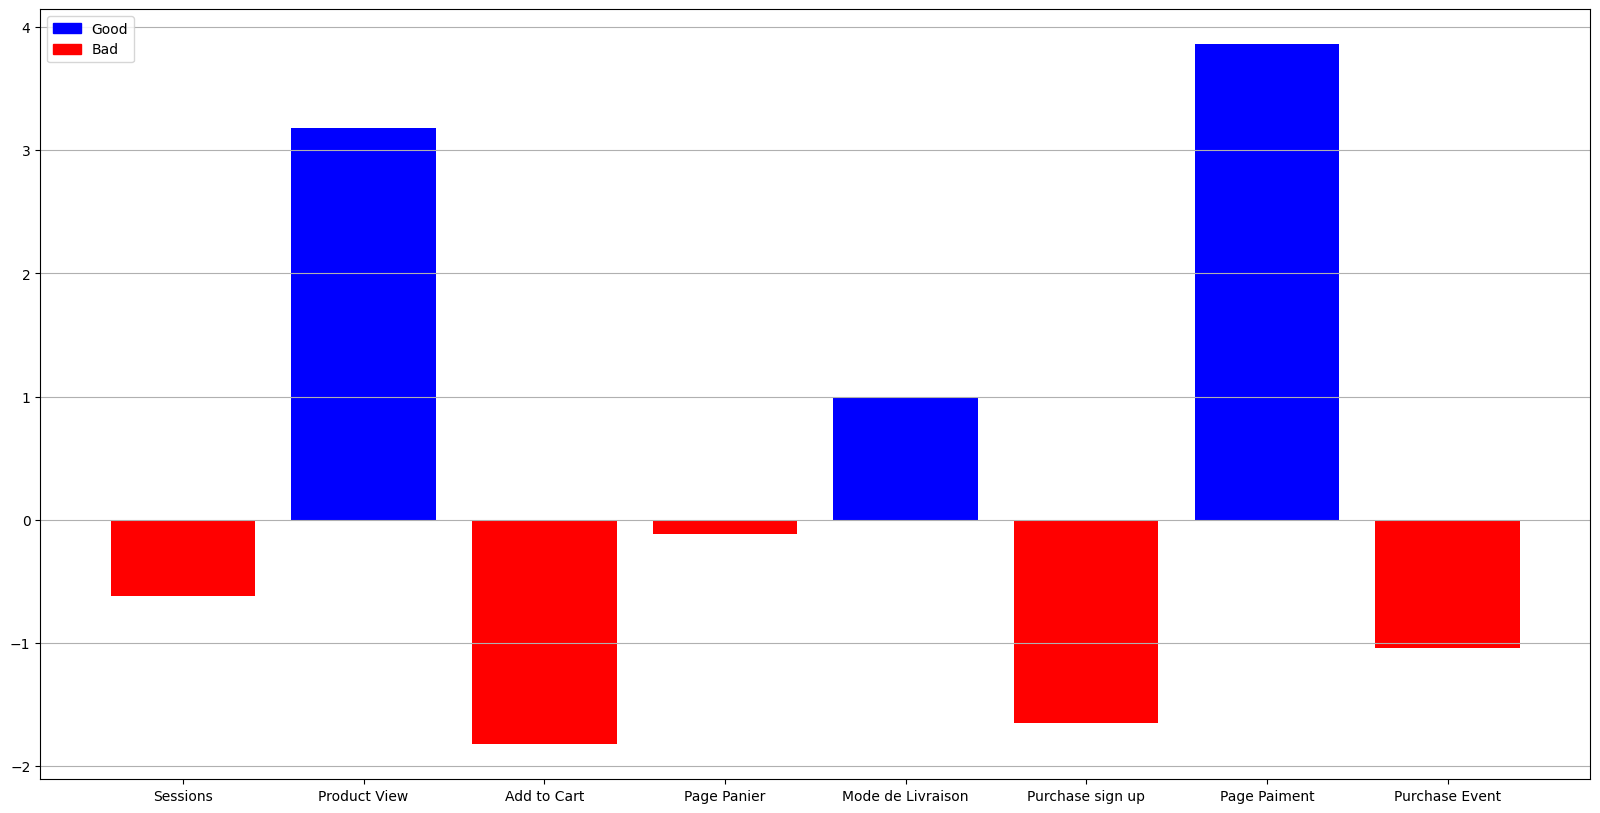

In [82]:
import matplotlib.patches as mpatches


fig = plt.figure(figsize=(20,10))
clrs = ['blue' if (x == False) else 'red' for x in dataframe['Good?']]
bad = mpatches.Patch(color='red', label='Bad')
good = mpatches.Patch(color='blue', label='Good')


plt.bar(x=dataframe['Steps'], height=dataframe['diff'], color=clrs)
plt.legend(handles=[good, bad])
plt.grid(axis='y')
plt.show()

# Analyse Panier

In [83]:
df1 = pd.read_csv('esp-panier-octobre.csv', sep=',')
df2 = pd.read_csv('esp-panier-mars.csv', sep=',')

total_panier_1, total_achetes_1 = df1['n_panier'][0], df1['n_achetes'][0]
total_panier_2, total_achetes_2 = df2['n_panier'][0], df2['n_achetes'][0]

df1 = df1.drop(index=0).reset_index(drop=True)
df2 = df2.drop(index=0).reset_index(drop=True)

In [84]:
total_panier_1, total_achetes_1

(80139, 4483)

In [85]:
total_panier_2, total_achetes_2

(119095, 8043)

In [86]:
phones = ['iPhone SE', 'iPhone 6', 'iPhone 7', 'iPhone 8', 'iPhone X ', 'iPhone XS', 'iPhone XR', 'iPhone 11', 'iPhone 12', 'iPhone 13',
          'Galaxy S7', 'Galaxy S8', 'Galaxy S9', 'Galaxy S10', 'Galaxy S20', 'Galaxy S21']

count_panier1, count_panier2 = {}, {}
count_achete1, count_achete2 = {}, {}
for phone in phones:
    count1p = df1[df1['article'].str.contains(phone)]['n_panier'].sum()
    count1s = df1[df1['article'].str.contains(phone)]['n_achetes'].sum()
    count_panier1[phone] = count1p
    count_achete1[phone] = count1s
    
    count2p = df2[df2['article'].str.contains(phone)]['n_panier'].sum()
    count2s = df2[df2['article'].str.contains(phone)]['n_achetes'].sum()
    count_panier2[phone] = count2p
    count_achete2[phone] = count2s

count_df1 = pd.DataFrame(count_panier1, index=[0]).T.reset_index()
count_df2 = pd.DataFrame(count_panier2, index=[0]).T.reset_index()
dum1 = pd.DataFrame(count_achete1, index=['0']).T.reset_index()
dum2 = pd.DataFrame(count_achete2, index=['0']).T.reset_index()
count_df1['sales'] = dum1['0']
count_df2['sales'] = dum2['0']

count_df1.columns = ['Phone', 'Cart-count', 'Sales-count']
count_df2.columns = ['Phone', 'Cart-count', 'Sales-count']

# Resultats Panier

In [91]:
px.pie(count_df1, names='Phone', values='Cart-count', title='Periode Aout-Octobre')
px.pie(count_df2, names='Phone', values='Cart-count', title='Periode Mars-Juillet')

In [88]:
count_df1['Period'] = ['Target' for _ in range(len(count_df1))]
count_df2['Period'] = ['Ref' for _ in range(len(count_df2))]

count_df1['Cart Percentage'] = count_df1['Cart-count']/total_panier_1 * 100
count_df2['Cart Percentage'] = count_df2['Cart-count']/total_panier_2 * 100

count_df1['Sales Percentage'] = count_df1['Sales-count']/total_achetes_1 * 100
count_df2['Sales Percentage'] = count_df2['Sales-count']/total_achetes_2 * 100

data = pd.concat([count_df1, count_df2])

px.bar(data, x='Phone', y='Cart-count', color='Period', barmode='group', title='Cart count comparaison (volume)')
px.bar(data, x='Phone', y='Cart Percentage', color='Period', barmode='group', title='Cart percentage comparaison')
px.bar(data, x='Phone', y='Sales-count', color='Period', barmode='group', title='Sales count comparaison (volume)')
px.bar(data, x='Phone', y='Sales Percentage', color='Period', barmode='group', title='Sales percentage comparaison')

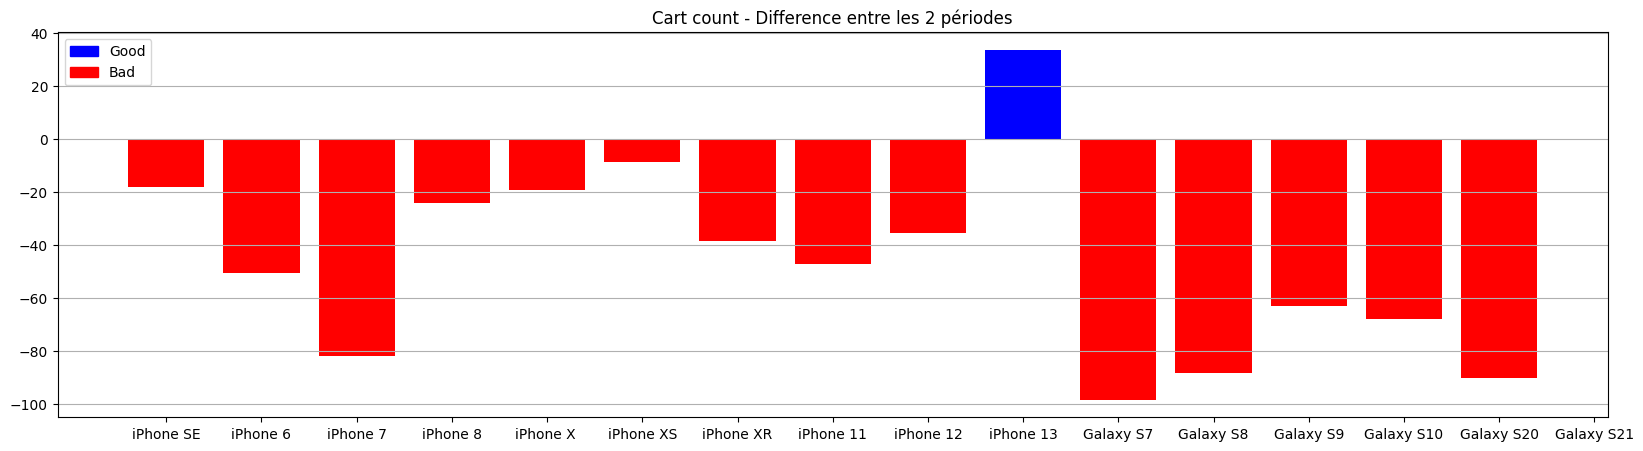

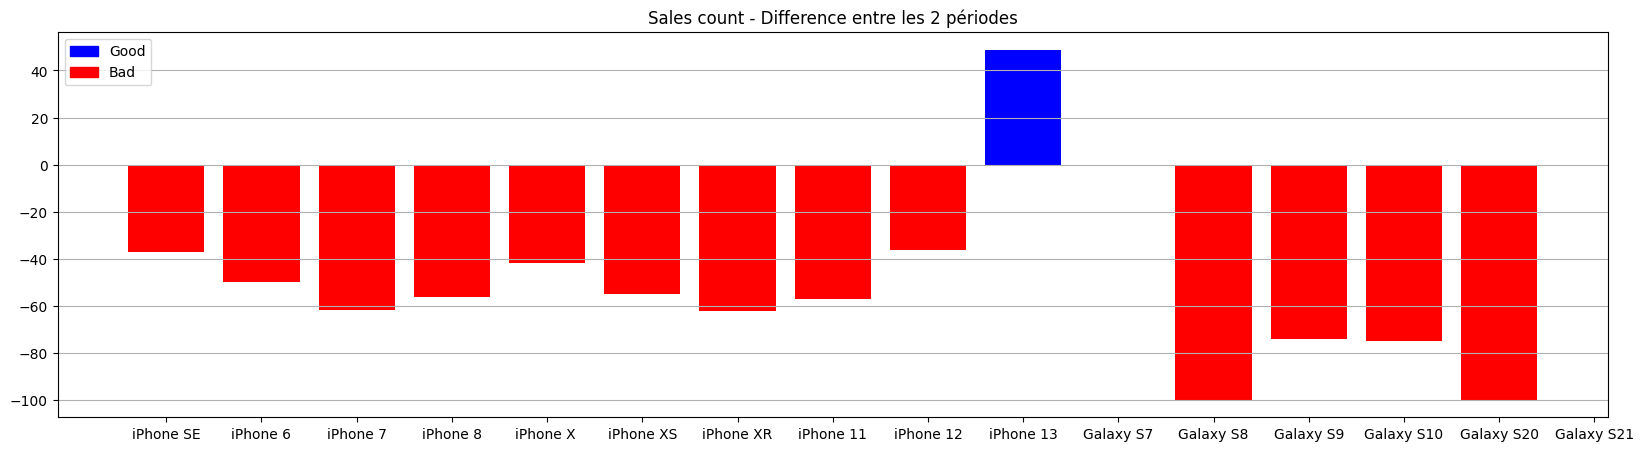

In [89]:
dataframe0 = pd.DataFrame()
dataframe0['Phone'] = count_df1['Phone'].copy()
dataframe0['diff'] = (count_df1['Cart-count'] - count_df2['Cart-count']) / count_df2['Cart-count'] * 100
dataframe0['Good?'] = dataframe0['diff'] < 0
dataframe0['diff-sales'] = (count_df1['Sales-count'] - count_df2['Sales-count']) / count_df2['Sales-count'] * 100
dataframe0['Good??'] = dataframe0['diff-sales'] < 0

fig = plt.figure(figsize=(20,5))
clrs = ['blue' if (x == False) else 'red' for x in dataframe0['Good?']]
bad = mpatches.Patch(color='red', label='Bad')
good = mpatches.Patch(color='blue', label='Good')



plt.bar(x=dataframe0['Phone'], height=dataframe0['diff'], color=clrs)
plt.legend(handles=[good, bad])
plt.grid(axis='y')
plt.title('Cart count - Difference entre les 2 périodes')
plt.show()

fig = plt.figure(figsize=(20,5))
clrss = ['blue' if (x == False) else 'red' for x in dataframe0['Good??']]
plt.bar(x=dataframe0['Phone'], height=dataframe0['diff-sales'], color=clrss)
plt.legend(handles=[good, bad])
plt.grid(axis='y')
plt.title('Sales count - Difference entre les 2 périodes')
plt.show()